# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Democratizing Autonomous Driving

Notebook 4 - Evaluation & Conclusion

This notebook contains the evaluation and conclusion for our model. However it came to our attention that the codes may return error message if the environment.yml is not installed. We therefore provided 4_alternative.py in case this happens.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2, os
import tensorflow as tf
from tensorflow.keras.models import load_model

from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from platform import python_version
import sys
import json

### Model Evaluation

Several cost functions, such as MSE and Huber, were utilized in evaluation of the model. Notably, a custom loss function that penalizes swerving performed best on both straightways and small turns. Of the models we built, the Huber loss model was the best in the simulator with a speed limit, but was unstable without one. On the contrary, the custom loss model could not make it around the course with a speed limit, but lasted longer on the course without one. 

In [2]:
# Visualize accuracy scores of model after trained on data
def plot_loss(history, model_name):
    train_loss = history['loss'] 
    test_loss = history['val_loss'] 
    epoch_labels = list(range(1,16))
    # Set figure size
    plt.figure(figsize=(12, 8)) 
    # Generate line plot of training, testing loss over epochs
    plt.plot(epoch_labels,train_loss, label='Training Loss', color='darkorchid', linestyle = '--') 
    plt.plot(epoch_labels,test_loss, label='Validation Loss', color='firebrick') 
    # Set title
    plt.title(f'Loss by Epoch', fontsize=25) 
    plt.xlabel('Epoch', fontsize=18) 
    plt.ylabel(r'Huber Loss, $\delta$ = 1.0', fontsize=18) 
    plt.xticks(epoch_labels, epoch_labels,fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=18);

#### Loss

Several cost functions, such as MSE and Huber, were utilized in evaluation of the model. Notably, a custom loss function that penalizes swerving performed best on both straightways and small turns. Of the models we built, the Huber loss model was the best in the simulator with a speed limit, but was unstable without one. On the contrary, the custom loss model could not make it around the course with a speed limit, but lasted longer on the course without one. 

In [3]:
#json.dump(history.history, open('history', 'w'))
history_model_huber_15 = json.load(open('../assets/model_15_epochs', 'r'))
print(history_model_huber_15['loss'])
print(history_model_huber_15['val_loss'])

[0.007388241123408079, 0.005166510120034218, 0.0044770450331270695, 0.0040555777959525585, 0.0037948722019791603, 0.0035333053674548864, 0.0033559747971594334, 0.003178239334374666, 0.00305375549942255, 0.0029158128891140223, 0.0028007295913994312, 0.0027071554213762283, 0.0026188171468675137, 0.0025329170748591423, 0.002458816161379218]
[0.009547244757413864, 0.009313859045505524, 0.009310279041528702, 0.009362826123833656, 0.009203005582094193, 0.009230180643498898, 0.009388945065438747, 0.009333822876214981, 0.009061269462108612, 0.010325492359697819, 0.009470313787460327, 0.009834242053329945, 0.009628728032112122, 0.009446615353226662, 0.009644902311265469]


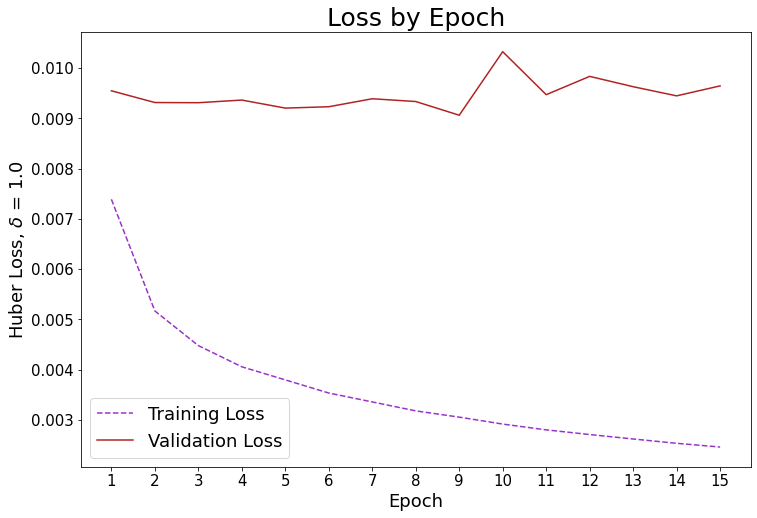

In [4]:
plot_loss(history_model_huber_15, 'Huber')
plt.savefig('../charts/huber_loss_per_epoch.png')

Loss by Epoch plot of Huber Loss Function with delta = 1.0 for 15 epochs of training in the NVIDIA model architecture. Clearly Epoch 9 was the best as the loss slowly started to increase for later epochs. The training data used for this run was collected by the team.

#### Filter

We also explored in details how our data were transformed by the filter layers of the convolutional model to have a better understanding of how our model works. Below is an example of the feature maps after filter on our third convolutional layer.

In [5]:
# Load model
#loaded_model_huber = load_model('./model_15_epochs.h5')
loaded_model_huber = load_model('../assets/model-huber.h5', compile = False)
# Display summary of model to check tha this is the correct model
loaded_model_huber.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 78, 158, 24)       1824      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 37, 77, 36)        21636     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 17, 37, 48)        43248     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 35, 64)        27712     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 33, 64)        36928     
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 33, 64)       

In [6]:
# summarize filter dimensions
for layer in loaded_model_huber.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer, layer.name, filters.shape)
    
# summarize feature map dimensions
for i in range(len(loaded_model_huber.layers)):
    layer = loaded_model_huber.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x1a43c46b10> conv2d_15 (5, 5, 3, 24)
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x1a43c46d90> conv2d_16 (5, 5, 24, 36)
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x1a43c46e90> conv2d_17 (5, 5, 36, 48)
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x1a43ce2d90> conv2d_18 (3, 3, 48, 64)
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x1a43cc8fd0> conv2d_19 (3, 3, 64, 64)
1 conv2d_15 (None, 78, 158, 24)
2 conv2d_16 (None, 37, 77, 36)
3 conv2d_17 (None, 17, 37, 48)
4 conv2d_18 (None, 15, 35, 64)
5 conv2d_19 (None, 13, 33, 64)


In [7]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

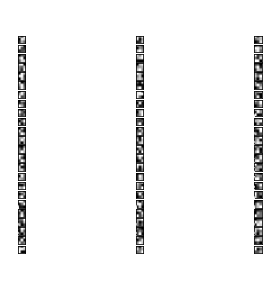

In [8]:
# plot first few filters
n_filters, ix = 24, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix, fc='grey')
        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            c = '\nRED'
        elif j == 1:
            c = '\nGREEN'
        else:
            c ='\nBLUE'
        plt.xlabel(xlabel=c,color='w')
        plt.ylabel(ylabel=f'  \n\n{i+1}',color='w',rotation=0)
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1

# Output: Activation following 1st Conv2D layer
layer_2 = tf.keras.Model(inputs=loaded_model_huber.inputs, outputs=loaded_model_huber.layers[5].output)

(160, 320, 3)
(1, 160, 320, 3)


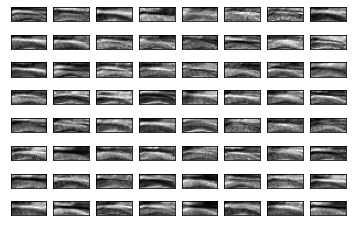

In [9]:
# load the image with the required shape & add channels (3-RGB)
img_path = '../data/data-anthony/IMG/center_2020_10_28_16_20_24_968.jpg'

# convert the image to an array
img = img_to_array(load_img(img_path, target_size=(160, 320)))

# expand dimensions so that it represents a single 'sample'
print(img.shape)
img = np.expand_dims(img, axis=0)
print(img.shape)

# get feature map for first hidden layer
feature_maps = layer_2.predict(img)

# plot all 64 maps in an 8x8 squares
row = 8
col = 8
d = 1
for _ in range(row):
    for _ in range(col):
        # specify subplot and turn of axis
        ax = plt.subplot(row, col, d)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, d-1], cmap='gray')
        d += 1

Layer 1
<td><img src='../charts/feature_maps_conv2D_layer01.png' alt="Drawing" style="width: 500px;"/></td>
Layer 2
<td><img src='../charts/feature_maps_conv2D_layer02.png' alt="Drawing" style="width: 500px;"/></td>
Layer 3
<td><img src='../charts/feature_maps_conv2D_layer03.png' alt="Drawing" style="width: 500px;"/></td>
Layer 4
<td><img src='../charts/feature_maps_conv2D_layer04.png' alt="Drawing" style="width: 500px;"/></td>
Layer 5
<td><img src='../charts/feature_maps_conv2D_layer05.png' alt="Drawing" style="width: 500px;"/></td>

We can see that the model itself is able to detect the road features on its own even on roads without lane marks, which is quite impressive and shows that this model could be more efficient compared to complex ones.

### Findings and Recommendations

We found that the current architecture of the CNN is successful in keeping the car in the lane as long as a speed limit is enforced. Remarkably, without lane marks, the CNN model is able to perform well enough with a Huber Loss Function to complete an entire lap with a limited amount of training data. Less than 30 minutes of human generated data, consisting of recorded steering angles and camera images, was enough to simulate autonomous driving. Hardware limitations can be resolved by making use of a batch generator such that data is partitioned to the GPU for parallel processing with the CPU. Capital expenditure on reasearch and development is reduced by accelerating and offloading work to a GPU with a batch generator. The cost of an entry level workstation GPU to perform the job of training is less than $350, while the cost of cloud computing with a comparable GPU is less than $75 for 40 hours of training. These options are preferrable as one epoch of training without the generator took nearly four hours and would require additional training data. In contrast, an observed average of only 40 minutes per epoch was required when making use of additional GPU processing power.

In conclusion, we strongly recommend that mid-sized car companies be not intimidated to compete within the auto-tech market!

Construction of a model capable of lap completion at full speed requires additional training, however, progress was made in the limited amount of time available for this project. A custom loss function, successful in suppressing the swerving behavior of the car, may be capable of completing an entire lap when combined with the Huber loss. The current training parameters did not provide an opportunity to test the performance of the model for robustness. Our observations suggest that the performance of the model stands to improve by training the model in a variety of conditions such as, augmenting extreme weather conditions, training on multiple tracks, and taking advantage of of pre-trained models by performing transfer learning.

Companies with long-haul trip durations and wide-open travel routes are capable of taking advantage of this simple model as is. As a useful driving co-pilot, this model could be deployed as an inexpensive accident averting detection device. This would be a useful instrument in all autos, but for long roadtrips where fatigue related fatalities are a consideration it has the potential to save lives.

### Limitations and Next Steps

Limitations:

Due to the simplistic nature of design, the application of our regression model may be limited in scope to open roadways clear of restrictions. In particular, the task of remote highway driving is much better suited for our self-driving model than is navigating through rush hour traffic in a large urban metropolis. Additionally, training times were long with the CNN and even, with a batch generator partitioning the data to the GPU, the accelerated workload ran about 40 minutes an epic. Due to the time constraints, we were not able to train enough to test whether the model could generalize to other tracks or not. This could be addressed with additional processing power.

Next Steps:

For our next steps, we would like to first increase the epochs of training. We believe this will improve our model's performance and are interested find if this could enable our model to generalize to a new track that has not been exposed to the model; We would also like to further augment the images to include different weather conditions so that the model can be generalized even more; Last but not least, to make our model more competitive, we would like to take advantage of pre-trained models and experiment with more complex road conditions such as city driving, change lanes, parking, etc to see if a CNN model could still hold. 